# Import Data

In [240]:
import os
import pandas as pd
import numpy as np

# data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/AceMejiaSanchez/Data/gaussian_small_d_1.tex")
# data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/Kate/Data/uniform_small_d_1.tex")
# data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/Fabiana/Data/uniform_large_d_1.tex")
# data = np.loadtxt("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/Ellee/Data/gaussian_large_d_1.tex")

# Creating NumPy array
array = np.array(data)

# Converting to Pandas DataFrame
df = pd.DataFrame(array)

# Look at data
df.head()


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,4.645936,4.444420,5.882756,6.699313,3.362616,5.624176,4.552078,2.622931,6.745673,5.324437,...,5.005013,5.525472,5.835458,4.334682,5.882338,4.320398,7.020972,4.373049,6.877316,1.0
1,6.685283,6.174860,5.757977,6.520946,5.247406,7.182799,7.582562,5.345074,6.239722,5.959306,...,5.936925,7.035587,5.807185,6.260498,5.713241,4.741151,8.523618,7.544684,6.321774,0.0
2,5.833938,5.480186,4.660813,2.640568,4.991246,5.329018,4.527029,4.486931,5.577468,4.682285,...,3.801542,3.500481,5.433775,4.678873,5.093956,4.844797,5.067531,5.539606,4.852789,1.0
3,3.840690,3.332420,4.881624,4.554784,4.809637,2.666808,5.156898,4.464810,5.552007,4.911071,...,5.185953,5.964207,5.399361,3.848238,5.883973,5.656945,4.562846,4.012647,6.632066,1.0
4,5.443890,5.533707,5.561488,4.913582,5.843202,5.324853,5.749330,5.860838,5.765502,5.117370,...,3.163400,5.900974,4.625896,5.144522,4.693454,6.534560,4.659843,4.017394,6.300626,1.0


# Convert 25/150 Columns into NON-CONSECUTIVE Categorical Variables

In [242]:
# Converting 25 columns from numerical floats -> categorical integers
for i in range(25):
    
    df.iloc[:,i] = df.iloc[:,i].round() # Rounding
    df.iloc[:,i] = df.iloc[:,i].astype(int) # Integer

In [198]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,9.0,10.0,10.0,8.0,9.0,9.0,9.0,9.0,9.0,8.0,...,7.400718,9.613205,7.522342,8.623440,8.639828,8.749055,9.208908,9.060524,8.933239,0.0
1,4.0,6.0,4.0,7.0,5.0,5.0,7.0,5.0,5.0,5.0,...,4.874917,4.508863,5.760392,5.427105,5.100361,6.743385,4.463974,5.194206,3.705310,1.0
2,10.0,9.0,9.0,9.0,10.0,12.0,10.0,9.0,10.0,10.0,...,7.719226,8.556954,7.247095,8.142212,8.558377,8.417857,8.760038,8.464984,9.188946,0.0
3,5.0,6.0,6.0,5.0,5.0,6.0,6.0,7.0,4.0,5.0,...,5.039694,4.193900,6.023520,6.168796,4.758035,5.899085,5.069440,6.234275,3.800722,1.0
4,8.0,10.0,8.0,9.0,9.0,11.0,9.0,9.0,8.0,9.0,...,6.617910,7.790990,10.612359,9.874875,8.924992,9.743395,8.162828,8.706789,9.728883,0.0


# Train Test Split

In [244]:
from sklearn.model_selection import train_test_split
# Split dataset into X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:150], df.iloc[:,-1], test_size=0.2, random_state=52)

In [202]:
y_train

159    1.0
198    0.0
259    1.0
301    1.0
220    1.0
      ... 
86     0.0
151    0.0
13     0.0
267    0.0
156    1.0
Name: 150, Length: 400, dtype: category
Categories (2, float64): [0.0, 1.0]

# Visualization

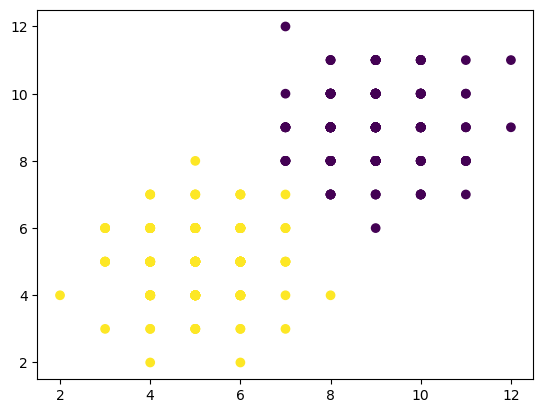

In [204]:
scatter = plt.scatter(X_train.iloc[:,6], X_train.iloc[:,7], c=y_train)

# XG-BOOST

In [45]:
# First, put this prompt: "conda install -c conda-forge py-xgboost" in anaconda to download xgboost package
# install xgboost in jupyter
!pip install xgboost

In [246]:
# import the classifier from the xgboost package
from xgboost import XGBClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Import scikit-learn dataset library
from sklearn import datasets

# read data
from sklearn.datasets import load_iris

# create model instance
# n_estimators: number of trees(estimators) the model uses --> the more used, the more accurate the model is
# max_depth: maximum depth of tree --> higher number makes model more complex, but too high can cause overfitting
# learning_rate: quantifies each tree's contribution to total prediction --> lower number takes longer, but can lead to better generalization
# objective: binary:logistic outputs probabilities. if classification is wanted, use binary:hinge
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic', enable_categorical=True)

# fit model with the training data
bst.fit(X_train, y_train)

# make predictions for the test dataset
preds = bst.predict(X_test)

# print predictions
print(preds)

# print model Accuracy (how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, preds))

[1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1]
Accuracy: 0.9


# SVM

In [119]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
# kernel: options for kernel include linear, poly, rbf, sigmoid
    # linear: use this when data can be split by a linear function
    # poly (polynomial): use this when data can be split by a polynomial function
    # rbf (radial basis function): use this when there are clusters of one class inside another
    # sigmoid: use this when the split between classes is curved and irregular
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# print predictions
print(y_pred)

# print model Accuracy (how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1.]
Accuracy: 1.0


# KNN

In [121]:
#import knn model
from sklearn.neighbors import KNeighborsClassifier

#create a knn classifier
#n_neighbors: predicting the label of the data point by looking at the 3 closest data points and getting them to "vote"
#algorithm: we may need to look at this if it misbehaves
neigh = KNeighborsClassifier(n_neighbors=5)

#train the model using the training sets
neigh.fit(X_train, y_train)

#predict the response for the test dataset
y_pred = neigh.predict(X_test)

#print predictions
print(y_pred)

#model accuracy (how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

[0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1.]
Accuracy: 1.0


# FIC

In [123]:
'''
Authors: Balachander S, Prahalad Srinivas C G, Yogesh Chandra Singh Samant, B Varshin Hariharan
'''
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

#import scikit learn packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

class FeatureClassifier:
  def __init__(self,reqAcc=0.01,classifier='DesicionTree',bias=[],control=None,n_jobs=None,random_state=None):
    self.featureClassifiers=[] #list of all the classifiers of all the selected features
    self.reqAcc=reqAcc #user specified cutoff value
    self.indexLs=[] # list of mapped index values to featureClassifiers
    self.flag=0
    self.bias=bias # list of biases for each and every label
    self.control=control #overfitting control for decision trees
    self.classifier=classifier #the classifier which is preferred by the user
    self.dic={'DecisionTree':0,'LinearRegression':1,'SVM':2,'LogisticRegression':3} #a dictionary which maps the classifier to its index
    self.n_jobs=n_jobs
    self.random_state=random_state
    self.num_lables = None

  def finIndex(self):
    #finds the index where the reqAcc condition fails and also created the indexLs[] for mapping
    for i in range(len(self.featureClassifiers)):
      if self.featureClassifiers[i][1] < self.reqAcc:
        return i
      self.indexLs.append(self.featureClassifiers[i][2])
    self.flag=1
    return i

  def fit(self,x,y):
    #applied the model to the dataset. The model is trained and saved for further prediction
    self.num_lables=len(set(y.flatten()))
    bestfeatures = SelectKBest(score_func=chi2,k=1)
    fit = bestfeatures.fit(x,y)

    for i in range(len(x[0])):
      clf=[DecisionTreeClassifier(max_depth=self.control,random_state=self.random_state),LinearRegression(n_jobs=self.n_jobs),SVC(gamma=self.control,random_state=self.random_state), LogisticRegression(penalty=self.control,random_state=self.random_state)][self.dic[self.classifier]]
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=self.random_state)
      clf.fit(X_train[:,i:i+1],y_train)
      self.featureClassifiers.append((clf,fit.scores_[i],i))
    self.featureClassifiers.sort(key=lambda x:x[1],reverse=True)
    index=self.finIndex()
    if self.flag==0:
      self.featureClassifiers=self.featureClassifiers[:index]
    return

  def predict(self,x):
    #given a list of inputs, predicts the possible outputs
    if not self.bias:
      self.bias=np.zeros(self.num_lables)
    if len(self.bias)<self.num_lables:
      raise AttributeError('Please check the lenth of bias list')
    yPred=[]
    for i in range(len(x)):
      pred_arr=np.zeros(self.num_lables)
      for j in range(len(self.indexLs)):
        pred=np.round(self.featureClassifiers[j][0].predict([[x[i][self.indexLs[j]]]]))
        pred_arr[pred]+=self.featureClassifiers[j][1]+self.bias[pred[0]]
      yPred.append(np.argmax(pred_arr))
    return yPred


In [135]:
#train the model using the training sets
clf1=FeatureClassifier(0,classifier='DecisionTree',control=3)
clf1.fit(np.array(X_train), np.array(y_train)[:,np.newaxis].astype(int))

#predict the response for the test dataset
#model accuracy (how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(np.array(y_test).astype(int),clf1.predict(np.array(X_test))))

print(clf1.indexLs)
clf1.featureClassifiers

Accuracy: 1.0
[136, 102, 12, 13, 99, 109, 139, 103, 129, 112, 4, 14, 58, 94, 93, 137, 47, 134, 59, 120, 0, 42, 122, 65, 121, 124, 127, 131, 64, 67, 123, 148, 130, 145, 29, 119, 111, 143, 57, 54, 144, 1, 133, 52, 126, 43, 104, 20, 38, 24, 117, 48, 25, 7, 128, 45, 113, 75, 106, 110, 60, 90, 35, 114, 31, 77, 62, 83, 5, 39, 66, 142, 107, 44, 21, 56, 19, 41, 73, 88, 76, 138, 69, 86, 89, 37, 96, 23, 2, 6, 51, 28, 108, 80, 22, 33, 100, 18, 30, 97, 71, 34, 68, 50, 61, 118, 141, 36, 63, 16, 84, 98, 105, 79, 27, 11, 26, 92, 125, 115, 53, 10, 85, 78, 32, 17, 8, 81, 82, 140, 74, 46, 40, 95, 101, 132, 70, 9, 135, 3, 147, 15, 91, 116, 87, 49, 55, 146, 72]


[(DecisionTreeClassifier(max_depth=3), 30.902744020452335, 136),
 (DecisionTreeClassifier(max_depth=3), 29.08277754996489, 102),
 (DecisionTreeClassifier(max_depth=3), 26.69072362930995, 12),
 (DecisionTreeClassifier(max_depth=3), 26.369190478602555, 13),
 (DecisionTreeClassifier(max_depth=3), 25.802436359002744, 99),
 (DecisionTreeClassifier(max_depth=3), 25.180272523937617, 109),
 (DecisionTreeClassifier(max_depth=3), 25.036212102731373, 139),
 (DecisionTreeClassifier(max_depth=3), 24.923520090798014, 103),
 (DecisionTreeClassifier(max_depth=3), 24.79824628055546, 129),
 (DecisionTreeClassifier(max_depth=3), 24.348075129239582, 112),
 (DecisionTreeClassifier(max_depth=3), 24.32918219362252, 4),
 (DecisionTreeClassifier(max_depth=3), 23.872093942354187, 14),
 (DecisionTreeClassifier(max_depth=3), 23.548718797867465, 58),
 (DecisionTreeClassifier(max_depth=3), 23.380360405545794, 94),
 (DecisionTreeClassifier(max_depth=3), 23.317780150976382, 93),
 (DecisionTreeClassifier(max_depth=3),